In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist,fashion_mnist
from tensorflow.keras.models import Model


def applyPreprocess(inputs):
    # To Normalize and Reshape the input data 
    inputs = inputs.astype("float32") / 255.0
    inputs = np.reshape(inputs, (len(inputs), 28, 28, 1))
    return inputs


def addNoise(data):
    # To Add noise to the input
    noise_factor = 0.2
    noisy_data = data + noise_factor * np.random.normal(
        loc = 0.0, scale = 1.0, size = data.shape
    )
    return np.clip(noisy_data, 0.0, 1.0)


def display(array1, array2):
    # Display N random images from the data
    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

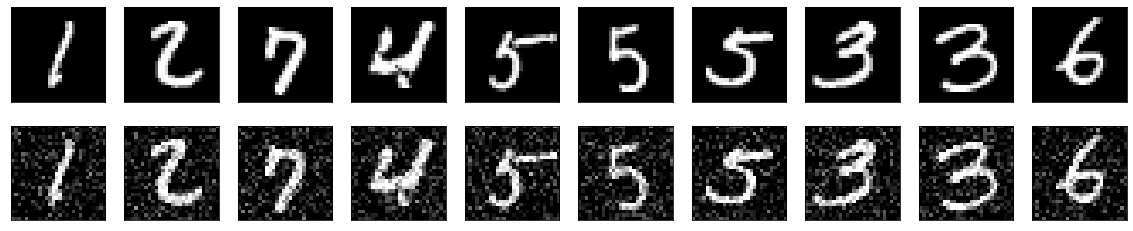

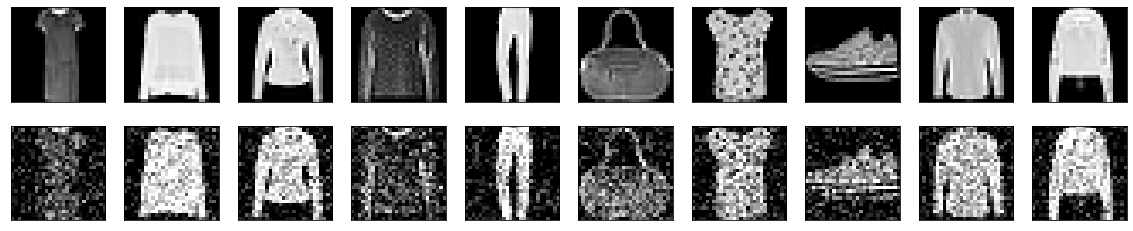

In [2]:
# Since we only need images from the dataset to encode and decode, we
# won't use the labels.

# Data loading
(mnist_train_data, _), (mnist_test_data, _) = mnist.load_data()
(fmnist_train_data,_), (fmnist_test_data,_) = fashion_mnist.load_data()


# Normalize and reshape the data
mnist_train_data = applyPreprocess(mnist_train_data)
fmnist_train_data = applyPreprocess (fmnist_train_data)

mnist_test_data = applyPreprocess(mnist_test_data)
fmnist_test_data = applyPreprocess(fmnist_test_data)

# Create a copy of the data with added noise
noisy_mnist_train_data  = addNoise(mnist_train_data)
noisy_fmnist_train_data  = addNoise(fmnist_train_data)
noisy_mnist_test_data = addNoise(mnist_test_data )
noisy_fmnist_test_data = addNoise(fmnist_test_data)

# Display the train data and a version of it with added noise
display(mnist_train_data, noisy_mnist_train_data)
display(fmnist_train_data, noisy_fmnist_train_data)

In [3]:
# Training Model

# Input
input = layers.Input(shape=(28, 28, 1))

# Encoder
x = layers.Conv2D(32, (4, 4), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (4, 4), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)


# Decoder
x = layers.Conv2DTranspose(32, (4, 4), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (4, 4), strides=2, activation="relu", padding="same")(x)

# Output
x = layers.Conv2D(1, (4, 4), activation="sigmoid", padding="same")(x)

# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 32)       16416 

In [4]:
autoencoder.fit(
    x=noisy_mnist_train_data,
    y=mnist_train_data,
    epochs=60,
    batch_size=200,
    shuffle=True,
    validation_data=(noisy_mnist_test_data, mnist_test_data),
)

Epoch 1/60
300/300 [==============================] - 10s 14ms/step - loss: 0.1698 - val_loss: 0.0841
Epoch 2/60
300/300 [==============================] - 4s 14ms/step - loss: 0.0813 - val_loss: 0.0783
Epoch 3/60
300/300 [==============================] - 4s 14ms/step - loss: 0.0776 - val_loss: 0.0762
Epoch 4/60
300/300 [==============================] - 4s 14ms/step - loss: 0.0760 - val_loss: 0.0748
Epoch 5/60
300/300 [==============================] - 4s 14ms/step - loss: 0.0749 - val_loss: 0.0744
Epoch 6/60
300/300 [==============================] - 4s 14ms/step - loss: 0.0742 - val_loss: 0.0734
Epoch 7/60
300/300 [==============================] - 4s 14ms/step - loss: 0.0737 - val_loss: 0.0728
Epoch 8/60
300/300 [==============================] - 4s 14ms/step - loss: 0.0732 - val_loss: 0.0725
Epoch 9/60
300/300 [==============================] - 4s 14ms/step - loss: 0.0728 - val_loss: 0.0722
Epoch 10/60
300/300 [==============================] - 4s 14ms/step - loss: 0.0725 - val_l

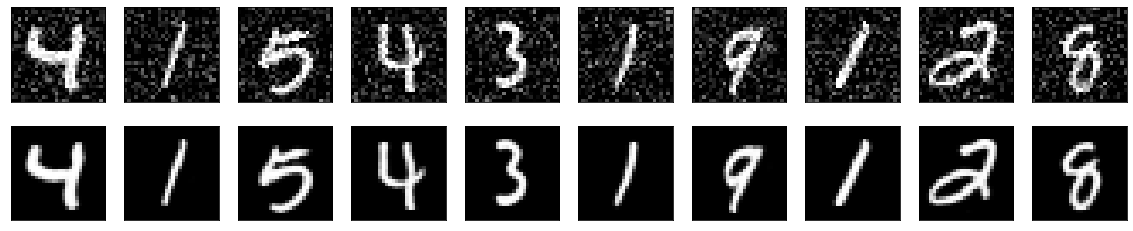

In [5]:
mnist_predictions = autoencoder.predict(noisy_mnist_test_data)
display(noisy_mnist_test_data, mnist_predictions)

In [6]:
autoencoder.fit(
    x=noisy_fmnist_train_data,
    y=fmnist_train_data,
    epochs=75,
    batch_size=200,
    shuffle=True,
    validation_data=(noisy_fmnist_test_data, fmnist_test_data),
)

Epoch 1/75
300/300 [==============================] - 4s 14ms/step - loss: 0.2720 - val_loss: 0.2681
Epoch 2/75
300/300 [==============================] - 4s 14ms/step - loss: 0.2649 - val_loss: 0.2663
Epoch 3/75
300/300 [==============================] - 4s 14ms/step - loss: 0.2637 - val_loss: 0.2654
Epoch 4/75
300/300 [==============================] - 4s 14ms/step - loss: 0.2630 - val_loss: 0.2649
Epoch 5/75
300/300 [==============================] - 4s 14ms/step - loss: 0.2625 - val_loss: 0.2647
Epoch 6/75
300/300 [==============================] - 4s 14ms/step - loss: 0.2621 - val_loss: 0.2642
Epoch 7/75
300/300 [==============================] - 4s 14ms/step - loss: 0.2619 - val_loss: 0.2639
Epoch 8/75
300/300 [==============================] - 4s 14ms/step - loss: 0.2616 - val_loss: 0.2638
Epoch 9/75
300/300 [==============================] - 4s 14ms/step - loss: 0.2614 - val_loss: 0.2635
Epoch 10/75
300/300 [==============================] - 4s 14ms/step - loss: 0.2612 - val_lo

In [7]:
fmnist_predictions = autoencoder.predict(noisy_fmnist_test_data)
#display(noisy_fmnist_test_data, fmnist_predictions)
mnist_predictions = autoencoder.predict(noisy_mnist_test_data)
#display(noisy_mnist_test_data, mnist_predictions)

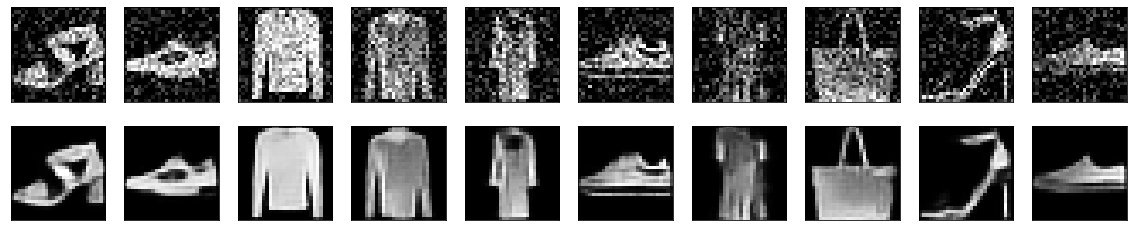

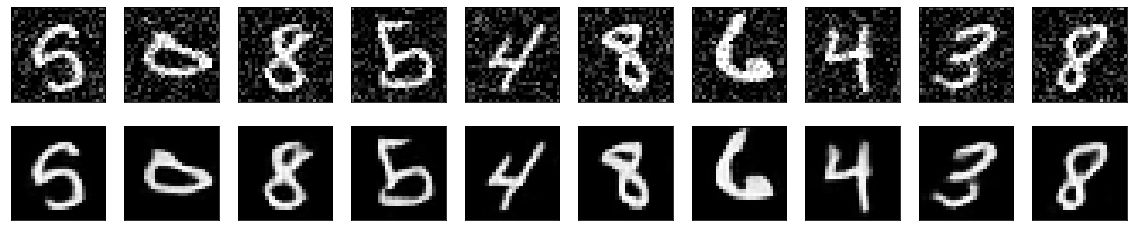

In [8]:
display(noisy_fmnist_test_data, fmnist_predictions)
display(noisy_mnist_test_data, mnist_predictions)